Plot the phase diagram for an Ising system on a three block chain-like SBM with external fields.

Uses data from simulations generated using *fig2-B-simulations.py*.

**Sources:**
- Customisation of heatmap tick labels based on: https://stackoverflow.com/questions/47784215/seaborn-heatmap-custom-tick-values. 

Created on: 07/12/19

In [3]:
import pandas as pd
import numpy as np
import ast
import tqdm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def from_np_array(array_string):
    '''
    Converter allows numpy arrays saved in a .csv file
    to be parsed as an array rather than being interpretted
    as a string.
    '''
    array_string = ' '.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))


f_path_block = "Data/block_level_phase_data.csv"
mag_data_block = pd.read_csv(f_path_block)

mag_data_MF=pd.DataFrame()
for p in range(4) :
    f_path_full_graph = f"Data/ensemble/full_MF_phase_data_{p}.csv"
    mag_data_MF_current = pd.read_csv(f_path_full_graph)
    mag_data_MF_current['graph']=p*np.ones(len(mag_data_MF_current))
    
    mag_data_MF = mag_data_MF.append(mag_data_MF_current)


In [5]:
mag_data_MF=mag_data_MF.rename(columns={'graph':'Graph'})
mag_data_MF['Graph']=[int(k+1) for k in mag_data_MF['Graph'].to_list()]

In [7]:
# To get the ensemble average we need to cluster the states?
# Check out what we do in the C-F plots?
"""
def round_to_2(x) :
    return round(x,2)
mag_data_MF['Mean_mag_2dp']=mag_data_MF['Mean_mag_MF'].apply(round_to_2)
mag_data_MF

"""


#Distinct values of the beta values:
beta_f_vals= list(set(list(mag_data_MF['beta_factor'])))

#Clustering according to the final magnetisation:
block_contr_w_clusters=pd.DataFrame()
for beta_factor in tqdm(beta_f_vals):

    current_df = block_cont_data.loc[(block_cont_data['beta_factor'] == beta_factor)]

    #Round magnetisation values in order to 'cluster' them:
    #Plus zero stops -0.0 and 0.0 from being treated differently.
    rounded_vals = [round(k, 2) + 0.0 for k in list(current_df['magnetisation'])]
    clus_labels = {}
    for index, k in enumerate(sorted(list(set(rounded_vals)))):
        clus_labels[k] = index

    current_df['mag_rounded'] = rounded_vals
    current_df['Solution'] = [ "Solution {}, M = {}".format(int(clus_labels[p]+1),p) for p in rounded_vals]
    current_df['Sol Lab'] = [ int(clus_labels[p]+1) for p in rounded_vals]

    #Label clusters based on sorting cluster means.
    block_contr_w_clusters = block_contr_w_clusters.append(current_df)

block_cont_data=block_contr_w_clusters

,Unnamed: 0,beta_factor,Mean_mag_MF,MB1_MF,MB2_MF,MB3_MF,init_state_num,initial_state,Graph,Mean_mag_2dp
0,0,5.0,0.284584,0.999915,0.847936,-0.994099,0,[-0.16595599 -0.16595599 -0.16595599 ... -0.99...,1,0.28
1,0,5.0,-0.983020,-0.951023,-0.998202,-0.999835,1,[-0.39533485 -0.39533485 -0.39533485 ... -0.81...,1,-0.98
2,0,5.0,-0.983020,-0.951023,-0.998202,-0.999835,2,[-0.62747958 -0.62747958 -0.62747958 ... -0.20...,1,-0.98
3,0,5.0,0.977458,0.999928,0.998163,0.934284,3,[0.07763347 0.07763347 0.07763347 ... 0.370439...,1,0.98
4,0,5.0,0.284599,0.999915,0.847978,-0.994097,4,[-0.5910955 -0.5910955 -0.5910955 ... -0.94...,1,0.28
...,...,...,...,...,...,...,...,...,...,...
1245,0,0.5,0.001758,0.246398,0.000252,-0.241377,45,[-0.14452534 -0.14452534 -0.14452534 ... -0.29...,4,0.00
1246,0,0.5,0.001753,0.246392,0.000248,-0.241379,46,[-0.57261352 -0.57261352 -0.57261352 ... -0.38...,4,0.00
1247,0,0.5,0.001750,0.246400,0.000237,-0.241387,47,[ 0.46649014 0.46649014 0.46649014 ... -0.55...,4,0.00
1248,0,0.5,0.001755,0.246395,0.000250,-0.241378,48,[-0.57177573 -0.57177573 -0.57177573 ... -0.71...,4,0.00


In [ ]:
mag_data_MF.groupby(['beta_factor','Mean_mag_2dp']).agg()

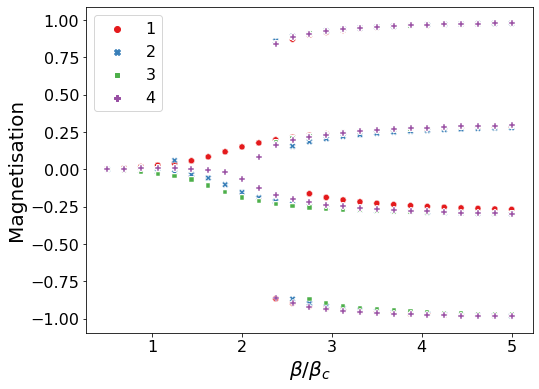

In [32]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(data=mag_data_MF,x='beta_factor',y='Mean_mag_MF',hue='Graph',palette='Set1',style='Graph')
#sns.scatterplot(data=mag_data_block,x='beta_factor',y='Mean_mag_block')

plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16,rotation=0)
plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)
plt.legend(fontsize=16)
plt.savefig("Plots/MF_ensemble_phase_diag.jpg",bbox_inches='tight')

#Q: perhaps a histogram over the ensemble might work?

Text(0, 0.5, 'Magnetisation')

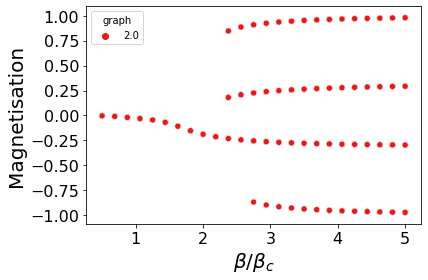

In [14]:
#mag_data_MF.loc[mag_data_MF['graph']==0.0]

sns.scatterplot(data=mag_data_MF.loc[mag_data_MF['graph']==2.0],x='beta_factor',y='Mean_mag_MF',hue='graph',palette='Set1',style='graph')


plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16,rotation=0)
plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)

# Heatmap with mean-field and full IIM on top

In [4]:
class scatter_overlay :
    
    
    """
    To overlay scatterplots on a heatmap we need
    to scale the values to those on the axis.
    """
    
    def __init__(self,x_var,y_var,data,hm_y_ticks,hm_x_ticks,hm_x_vals,marker_style='ko',label='',alpha=0.4,markersize=5.0) :
        
        x_vals = list(data[x_var])
        y_vals = list(data[y_var])
        
        x_max = max(hm_x_vals)
        x_min = min(hm_x_vals)
        percent_through = [ (b-x_min)/(x_max-x_min) for b in x_vals ]
        x_block_width = ((hm_x_vals[1]-hm_x_vals[0])/max(hm_x_vals))*max(hm_x_ticks)
        
        scaled_x_vals = [ i*max(xticks) + x_block_width/2.0 for i in percent_through ]
        
        
        scaled_y_vals = [ hm_y_ticks[-1]*((k+1)/2.0) for k in y_vals ]
        
        plt.plot(scaled_x_vals,scaled_y_vals,marker_style,label=label,markersize=markersize,alpha=alpha)
    

Text(-4.0, 0.1, '(b)')

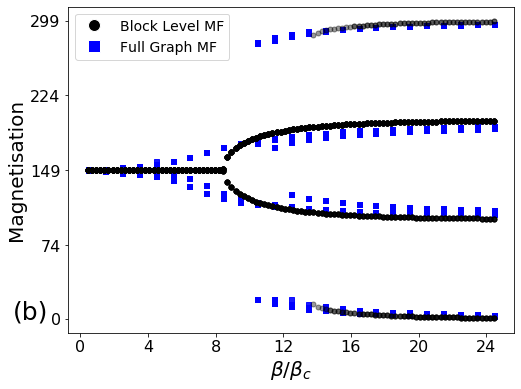

In [5]:

num_bins=300
bins = np.linspace(-1.0, 1.0, num_bins)
num_yticks = 5
yticks = np.linspace(0, len(bins) - 1, num_yticks, dtype=np.int)
yticklabels = [ round(bins[idx],1) + 0.0 for idx in yticks]

num_xticks = 7
beta_vals = sorted(list(set(list(mag_data_MF['beta_factor']))))
xticks = np.linspace(0, len(beta_vals ) - 1, num_xticks, dtype=np.int)
xticklabels = [  round(beta_vals [idx],2) for idx in xticks]


fig,ax=plt.subplots(figsize=(8,6))



full_mf_scat = scatter_overlay('beta_factor','Mean_mag_MF',
                               mag_data_MF,yticks,xticks,beta_vals,
                              marker_style='bs',alpha=0.9,label='Full Graph MF')


block_scat = scatter_overlay('beta_factor','Mean_mag_block',mag_data_block,yticks,
                             xticks,beta_vals,label='Block Level MF')


#'Proxy-Artist' for legend labels since low alpha value means things are otherwise faint:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
legend_elements = [ Line2D([0], [0], marker='o', color='w', label='Block Level MF',
                          markerfacecolor='k', markersize=12),
                   Line2D([0], [0], marker='s', color='w', label='Full Graph MF',
                          markerfacecolor='b', markersize=12)]
plt.legend(handles=legend_elements,fontsize=14,loc='upper left')

#plt.legend()
ax.set_yticks(yticks)
ax.set_xticks(xticks)
plt.xticks(fontsize=16,rotation=0)
plt.yticks(fontsize=16,rotation=0)
plt.xlabel("$\\beta / \\beta_c$",fontsize=20)
plt.ylabel("Magnetisation",fontsize=20)


plt.text(-4.0,0.1,'(b)',fontsize=25)

#plt.savefig("Plots/three_block_phase_diagram.jpg",dpi=100)